# Analisis de datos ZOO

El siguiente analisis consiste en determinar atravez de los atributos del dataset la clasificacion de cada animal, asignamos las respectivas columnas para facilitar la interpretacion de los datos.

In [2]:
import pandas as pd
zdf = pd.read_csv('zoo.csv', delimiter=',',names=['name', 'hair', 'feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','type'])

zdf.head()

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Variables Data y Target

Se dividen los datos en 2 variables para separar nuestros datos de la columna a predecir

In [3]:
zdf_data = zdf.iloc[:,1:17]
zdf_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [4]:
zdf_target =zdf.iloc[:,17]


## Analisis KNN

Analizamos nuestros datos utilizando algoritmo K vecinos mas proximos

In [5]:
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as knn

X_train, X_test, y_train, y_test = tts(zdf_data, zdf_target, test_size=0.2, random_state=42)


inicializamos las listas para eventualmente graficar ajuste de numero de vecinos optimo

In [6]:
training_accuracy = []
test_accuracy = []

Creamos la curva de "*training/test acurracy vrs. k*", para más detalle del parámetro **score** refererirse a la documentación en: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 

NOTA: La rutina descrita a continuación, se puede usar para diferentes rangos y diferentes hiper-parámetros, en algunos casos dependiendo de los aspectos anteriores el tiempo de ejecución puede tomar más tiempo dependiendo del poder computacional disponible.

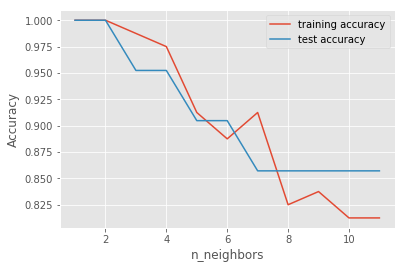

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

neighbors_settings = range(1, 12)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = knn(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


Analizando el grafico anterior encontramos que con el hiperparametro de **K=6** vecinos es como el modelo tiene el mejor desempeño 

In [8]:
print(test_accuracy[5])

0.9047619047619048


## Analisis Bayes

Analizaremos nuestros datos ahora con el modelo NB Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB


X_train, X_test, y_train, y_test = tts(zdf_data, zdf_target, test_size=0.2, random_state=42)


Entremanos los datos usando el modelo Gaussiano de Bayes

In [10]:
nbg = GaussianNB().fit(X_train, y_train)
nbb = BernoulliNB().fit(X_train, y_train)

print("Gaussian Training set score: {:.3f}".format(nbg.score(X_train, y_train)))
print("Gaussian Test set score: {:.3f}".format(nbg.score(X_test, y_test)))

print("Bernoulli Training set score: {:.3f}".format(nbb.score(X_train, y_train)))
print("Bernoulli Test set score: {:.3f}".format(nbb.score(X_test, y_test)))

Gaussian Training set score: 1.000
Gaussian Test set score: 0.952
Bernoulli Training set score: 0.988
Bernoulli Test set score: 0.952


Analizando los datos con el modelo Gausianno de Bayes resulta igual al testear con datos nuevos al modelo Bernoulli el cual es recomendado para datos binarios.

## Analisis con Desicion Tree

Para el siguiente Analisis utilizaremos como clasificador el algoritm Desicion Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = tts(zdf_data, zdf_target, test_size=0.2, random_state=42)


Configuramos nuestro modelo con una profundidad maxima de 5 y procedemos a entrenar con nuestros datos


In [12]:
DTM = DecisionTreeClassifier(max_depth = 5)
DTM.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

importamos la metrica de accuracy para ayudarnos a medir el desempeño de nuestro modelo de arbol y procedemos a predecir

In [13]:
from sklearn.metrics import accuracy_score
y_predict = DTM.predict(X_test)

medimos el nivel de precision de nuestro modelo de arbol

In [14]:
result = accuracy_score(y_test, y_predict)
print(result)

0.9523809523809523


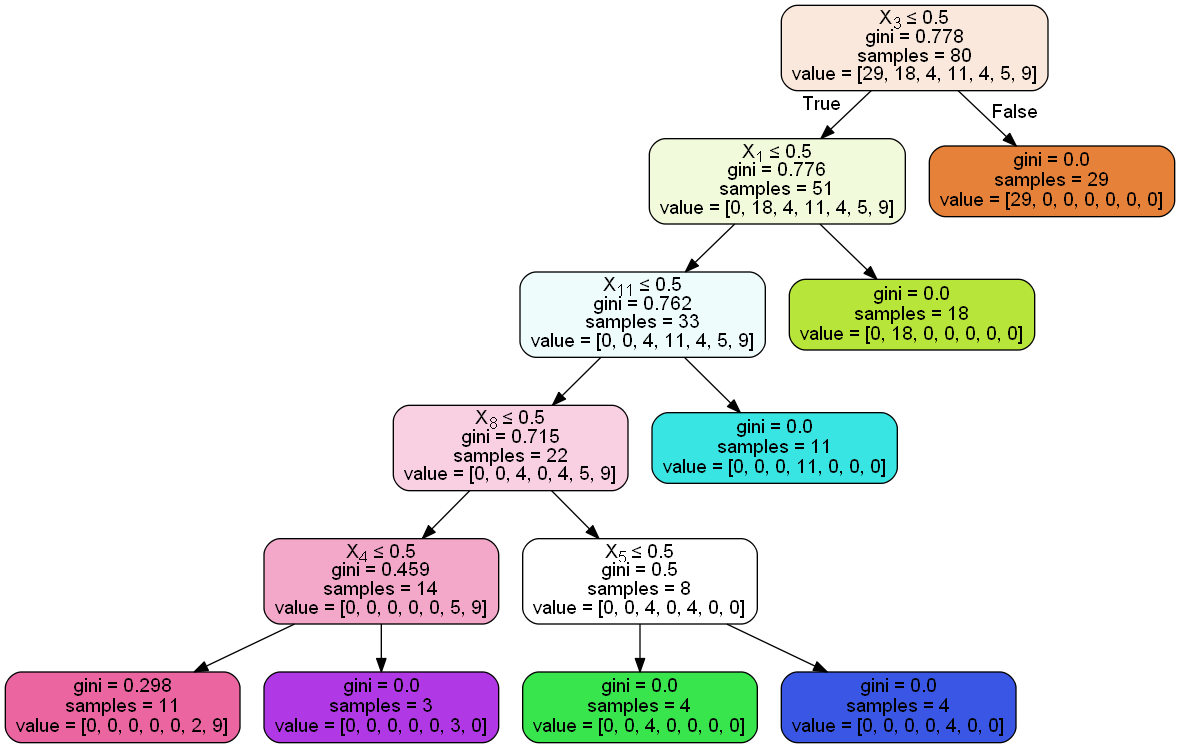

In [15]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTM, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


Analizando los datos con diferentes niveles de profundidad maxima lleguamos a el mismo nivel precision **0.952** no pudimos superar esa precision hasta ahora la cual la logramos con el modelo de **Bayes** y con el modelo de **Decision Tree**

## Metodos de Ensamble

El objetivo de los **métodos de ensamble** es combinar las predicciones de varios estimadores de base construidos con un algoritmo de aprendizaje dado para mejorar la generalizabilidad/robustez sobre un solo estimador.

En los **métodos de promediación**, el principio rector es construir varios estimadores independientemente y luego promediar sus predicciones. En promedio, el estimador combinado es usualmente mejor que cualquiera de los estimadores base porque su varianza es reducida.


Por el contrario, en los **métodos de empuje**, los estimadores de base se construyen secuencialmente y se trata de reducir el sesgo del estimador combinado. La motivación es combinar varios modelos débiles para producir un conjunto poderoso.

Analizaremos los datos con un esamble de tipo Bagging

In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

X_train, X_test, y_train, y_test = tts(zdf_data, zdf_target, test_size=0.2, random_state=42)


model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9523809523809523

## Analisis Final

Despues de haber evaluado varios modelos logicos y ajustando sus hiperparametros he llegado a la conclusion de que el porcentaje de precision es lo maximo que se puede lograr con las tecnicas utilizadas y conocidas en clase hasta ahora, me queda la gran incognita y deseo de probar otros tipos de tecnicas para analizar si es posible mejorar este porcentaje.

Con lo conocido en clase hasta ahora he podido lograr un porcentaje bastante alto, pero me interesa mucho saber si se puede mejorar y aprender que tecnicas utilizar cuando se llega a un techo de precision usando varios algoritmos. 